# TDT4173 Machine Learning - Assignment 1

## Theory [1.5 point]

___

###### 1. **[0.1 points]** What is concept learning? + explain with an example

> The problem of searching through a predefined space of potential hyptheses for the hypothesis that best fits the training examples'' - Tom Michell

When a human being is learning something, much of it is based on generalized concepts gained from past experiences. For instance, if a human were to identify if a certain type of car, we differentiate the betwen the cars based on a set of features. This bundle of features can be called a concept. 

Similarly, we can provide a machine with a training sample of a given signal or dataset from which it can learn the correct concepts needed to identify wether new data or objects belong to a specific category. These generalized concepts is commonly referred to as a hypothesis. 

**An example:** Let's say we want to identify reptiles in a dataset containing all types of animals. We extract a random subset for training the model, in which we have a set of features; *scales, coldBlooded, legs, eggLaying*. To start with we have a random sample from the training set as the starting hypothesis. This hypothesis will constantly evolve as we challenge the current hypothesis against the training data. This will go on until the hypothesis remains unchanged, and we have the best possible concept needed to differentiate reptiles from other animals.
___

###### 2. **[0.1 points]** What is function approximation and why do we need them?

Function approximation is the process of adjusting the given model, or function, to most likely represent the true target function. As for the evolution of hypothesis explained in the previous question, we need these function approximations to actively determine the vital parameters and their weight.

3. **[0.4 points]** What is inductive bias in the context of machine learning, and why is it so important? Decision tree learning and the candidate elimination algorithm are two different learning algorithms. What can you say about the inductive bias for each of them?

> An inductive bias of a learner is the set of additional assumptions sufficient to justify its inductive inerference as deductive inference'' - Tom Michell

Inductive bias is a set of assumptions used to predict a given output if it encounters a new input. Without this bias, the algorithm wouldn't have learned anything except how to handle distinct key-value pairs, for instance, if a car encounters a cat, but it is trained to avoid dogs, it might not with high enough certainty know what to do. 

When using a decision tree learning algorithm, we use a bias called a search bias which is greedy and keeps the most relevant searches higher up in the tree to make it as short as possible. The candidate elimination algorithm, however, uses a representational bias because it cannot represent all hypothesis. So instead of greedily choosing which part of the whole hypothesis space to search, it assumes that the solution to the problem can be expressed as a conjunction of concepts.

___

###### 4. **[0.3 points]**  What is overfitting, and how does it differ from *underfitting*? Briefly explain what a validation set is. How can cross-validation be used to mitigate overfitting?

Overfitting refers to a model that models the training data too well. Overfitting occurs when the model learns both the valuable data and noise in the training data, which will be applied to new datasets and negatively impact the model's ability to generalize. Underfitting, on the other hand, refers to a model that neither has learned the training data nor infer from new data.

The validation set makes up about 20 percent of the bulk of data used (training set ~60%) when training the model. The validation set is used for choosing the best of the models found by the training data and optimizing it. During the validation phase, overfitting is checked and avoided.

Cross-validation uses the initial training data to generate *n* different mini train-test subsets and used to generate *n* different hypothesis, which allows us to tune the hyperparameters with only our original training set. This way of repeating the expoeriment multiple times gives a more accurate indication of how well the model generalizes to unseen data. Cross-validation does not prevent overfitting in itself, but it may help in identifying a case of overfitting.

___

###### 2. **[0.6 points]** Apply candidate elimination (CE) algorithm on the data given below in Table 1, where {T reatmentSuccessful} is the target attribute. The tabular data given below is based on physiotherapy questionnaire results for patients having pain concerning musculoskeletal disorders and its treatment successfulness. ‘Problem Area’ indicates region of the pain, ‘Activity Level’ describes the current physical activity level of the patient, ‘Sleep Quality’ indicates the level of sleep quality of the patient and ‘Treatment Successful’ indicates whether the treatment was successful in lowering the pain or not. The task is to learn to predict the value of Treatment Successful for an arbitrary values of the questionnaires. Describe the version space, specific hypothesis and general hypothesis boundary for this task (represent the version space starting from the initial boundary sets corresponding to the most specific and most generic hypotheses. You must represent the version space when CE algorithim visits a new negative or positive sample/example). The representation for “no value is acceptable” is ‘Ø’, and “any value is acceptable” is ‘?’. Also, the hypothesis space should be restricted to include only conjunctions of the attribute values.

| **Sex** | **Problem Area** | **Activity Level** | **Sleep Quality** | **Treatment Successful** |
|---------|:----------------:|:------------------:|:-----------------:|:-------------------------:|
| Female  |        Back      |       Medium       |       Medium      |           yes             |
| Female  |        Neck      |       Medium       |        High       |           yes             |
| Female  |      Shoulder    |        Low         |        Low        |           no              |
| Male    |        Neck      |        High        |      Medium       |           yes             |
| Male    |        Back      |       Medium       |        Low        |           yes             |

The candidate-elimination algorithm computes the version space containing all (and only those) hypotheses from H that are consistent with an observed sequence of training examples. For our hypothesis space (*H*), we will start with the sets of maximally general (*G*) and maximally specific (*S*) hypotheses:
```
S0 = {<Ø,Ø,Ø,Ø>}
G0 = {<?,?,?,?>}
H0 = {<Ø,Ø,Ø;Ø>}
```
If we now feed our data from top to bottom of the list, the sequential hypothesis spaces becomes:
```
D1 = {Female, Back, Medium, medium} + (positive)
Positive dataset -> we need to generalize our specific hypothesis:
S1 = {Female, Back, Medium, medium}
G1 = {<?,?,?,?>}
```
```
D2 = {Female, Neck, Medium, High} - (positive)
S2 = {<Female,?,Medium,?>}
G2 = {<?,?,?,?>}
```
```
D3 = {Female, shoulder, low, low} - (negative)
negative dataset -> make a minimal specialization of G that are consistent with the negative sample:
S3 = {<Female,?,Medium,?>}
G3 = {<?,Back,?,?>, <?,neck,?,?>, <?,?,medium,?>, <?,?,high,?>, <?,?,?,high>, <?,?,?,medium>}
```
```
D3 = {Male, neck, high, medium} - (positive)
S3 = {<?, ?, ?, ?>}
G3 = {<>}
```
This proves that the dataset is inconsistent since the specific boundary has become as general as it could be and accepts all possible hypothesis. 
___

## Task 1: Linear Regression [1.5 points]

For the programming part: Run it sequentually in jupyter as some functions, variables and imports are essential for later code.


###### 2. **[0.3 points]** Implement linear regression with ordinary least squares (OLS) using the closed-form solution seen in Equation 9.
The function "calc_OLS" fucntion implements the Ordinary Least Squares method:

In [980]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def create_directory_from_path(direc):
    """
    Loads directory structure with CSV files into directory
    
    Parameters
    ----------
    direc : str
        Path to directory to be converted to dictionary
      
    Returns
    ----------
    ds : dictionary
        Directory modelled as a dictionary
    """
    
    ds = {}
    for i in os.listdir(direc):
        path = os.path.join(direc, i)
        if os.path.isfile(path): continue # continue if file in root
        ds[i] = {}
        for j in os.listdir(path):
            if os.path.splitext(j)[1] == '.csv': # Select only files with given extension
                with open(os.path.join(path, j)) as data:
                    key = j.replace('.csv','')
                    df = pd.read_csv(data)
                    ds[i].update( {key : df.values } )
                   # values = df.values
                    #for idx, var in enumerate(df):
                        #ds[i][key].update( {var : values[:,idx]} )
    return ds
    
def calc_MSE(x, y, w, n):
    """
    Calculates the mean square error (MSE)
    """
    mat = x.dot(w) - y
    return (mat.T.dot(mat))/n

def calc_OLS(x, y):
    """
    calculates the error using Ordinary Least Squares (OLS)
    """
    return np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)


###### 2. **[0.5 points]** ] Load the data in train 2d reg data.csv (training data) and test 2d reg data.csv (test data) and use your OLS implementation to find a set of good weights for the training data. Show the weights as well as the model error Emse(w) for the training and test set after training. Is your model generalizing well?

In [1004]:
#----------- load all data into a dictionary -----------

#ds = create_directory_from_path(os.getcwd() + '/dataset/')
ds = create_directory_from_path('dataset/')

#----------- load training datasets -----------

# Load CSV dataset (ds) into variables
x_train = ds['regression']['train_2d_reg_data'][:,0:2]
y_train = ds['regression']['train_2d_reg_data'][:,2:3]
N = len(x_train)
# Prepend extra dimension of ones to merge bias with weights
x_train = np.column_stack((np.ones((N, 1)), x_train))

#----------- load test datasets -----------

# Load CSV dataset (ds) into variables
x_test = ds['regression']['test_2d_reg_data'][:,0:2]
y_test = ds['regression']['test_2d_reg_data'][:,2:3]
N = len(x_test)

# Prepend extra dimension of ones to merge bias with weights
x_test = np.column_stack((np.ones((N, 1)), x_test))

In [1005]:
#----------- Find weights -----------

W = calc_OLS(x_train, y_train)
print("Weight w0 (bias) =", W[0,0]); print("Weight x1 =", W[1,0]); print("Weight x2 =", W[2,0])

Weight w0 (bias) = 0.24079270870924713
Weight x1 = 0.4815568550719193
Weight x2 = 0.05864390258297651


In [983]:
#----------- MSE for both training and testing data -----------

print("MSE for training data: ", calc_MSE(x_train, y_train, W, N)[0,0])
print("MSE for test data: ", calc_MSE(x_test, y_test, W, N)[0,0])

MSE for training data:  0.019289865644144304
MSE for test data:  0.00952976445061898


* ***Is the model generalizing well?***

So far the model seems to generalize well, although the datasets are very alike. The model even had better results when it was applied to the test data.

###### 3. [0.7 points] Load the data in train 1d reg data.csv and test 1d reg data.csv and use your OLS implementation to find a set of good weights for the training data. Using these weights, make a plot of the line fitting the data and show this in the report. Does the line you found fit the data well? If not, discuss in broad terms how this can be remedied. Tip: Remember, for this dataset there are only two weights: the first is the bias, while the second is the slope.


In [984]:
#----------- load training datasets -----------

# Load CSV dataset (ds) into variables
x_train = ds['regression']['train_1d_reg_data'][:,0:1]
y_train = ds['regression']['train_1d_reg_data'][:,1:2]
N = len(x_train)

# Prepend extra dimension of ones to merge bias with weights
x_train = np.column_stack((np.ones((N, 1)), x_train))

#----------- load test datasets -----------

# Load CSV dataset (ds) into variables
x_test = ds['regression']['test_1d_reg_data'][:,0:1]
y_test = ds['regression']['test_1d_reg_data'][:,1:2]
N = len(x_test)

# Prepend extra dimension of ones to merge bias with weights
x_test = np.column_stack((np.ones((N, 1)), x_test))

In [985]:
#----------- Find weights -----------

W = calc_OLS(x_train, y_train)
print("Weight w0 (bias) =", W[0,0]); print("Weight w1 =", W[1,0])

Weight w0 (bias) = 0.19558660470155045
Weight w1 = 0.6128879513156787


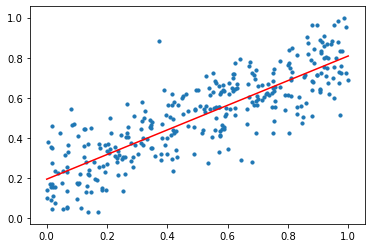

In [986]:
#----------- Plot training data -----------

x_axis = np.linspace(0,1)
y_axis = W[0,0] + W[1,0]*x_axis

plt.scatter(x_train[:,1], y_train, s=10); plt.plot(x_axis, y_axis, color='red')

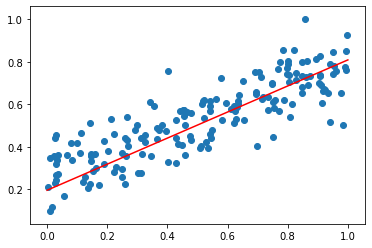

In [1008]:
#----------- Plot test data -----------

plt.scatter(x_test[:,1],y_test); plt.plot(x_axis, y_axis, color='red')

In [988]:
#----------- MSE for both training and testing data -----------

print("MSE for training data: ", calc_MSE(x_train, y_train, W, N)[0,0])
print("MSE for test data: ", calc_MSE(x_test, y_test, W, N)[0,0])

MSE for training data:  0.025552040663568927
MSE for test data:  0.012442457462048938


* **Does the line you found fit the data well? If not, discuss in broad terms how this can be remedied**

As before, it seems the model fits the testing data perfectly. We don't need any more weights as the relationship between the variables seems to be very much linear.

## Task 2: Logistic Regression [1 point]


###### 1. [0.5 points] Load the data in cl train 1.csv and cl test 1.csv and use your logistic regression implementation to train on the data in the training set. Is the data linearly separable? Explain your reasoning. Additionally, show a plot of the crossentropy error for both the training and test set over 1000 iterations of training. What learning rate η and initial parameters w did you select? Is your model generalising well? Keep in mind that you may have to test several different learning rates to get a good classification. It may be helpful to plot the decision boundary 2 to get a visual representation of the fit. This will allow you to see how well you are doing.

* y = 1 when wT x ≥ 0 

In [989]:
#----------- load training datasets -----------

# Load CSV dataset (ds) into variables
x_train = ds['classification']['cl_train_1'][:,0:2]
y_train = ds['classification']['cl_train_1'][:,2:3]
N = len(x_train)

# Prepend extra dimension of ones to merge bias with weights
x_train = np.column_stack((np.ones((N, 1)), x_train))

#----------- load test datasets -----------

# Load CSV dataset (ds) into variables
x_test = ds['classification']['cl_test_1'][:,0:2]
y_test = ds['classification']['cl_test_1'][:,2:3]
N = len(x_test)

# Prepend extra dimension of ones to merge bias with weights
x_test = np.column_stack((np.ones((N, 1)), x_test))

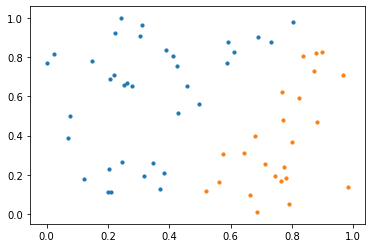

In [1006]:
#----------- Visualize training data before training -----------

def extract_true_coord(x1,x2,y):
    """
    Returns two seperate arrays based on the logical value of the last colum (y)
    """
    true = []
    false = []
    for i in range(len(y)):
        if y[i] == 1:
            true.append([x1[i], x2[i], y[i]])
        else:
            false.append([x1[i], x2[i], y[i]])
    return (np.array(true), np.array(false))

#----------- Training data -----------

(true_coords_train, false_coords_train) = extract_true_coord(x_train[:,1], x_train[:,2], y_train[:,0])

plt.scatter(true_coords[:,0], true_coords[:,1], s=10, label='class1')
plt.scatter(false_coords[:, 0], false_coords[:,1], s=10, label='class2')

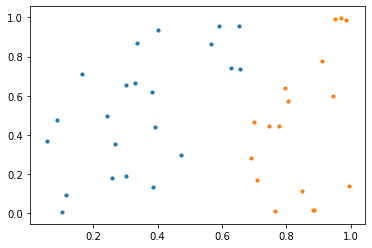

In [991]:
#----------- Test data -----------

(true_coords_test, false_coords_test) = extract_true_coord(x_test[:,1], x_test[:,2], y_test[:,0])

plt.scatter(true_coords_test[:,0], true_coords_test[:,1], s=10, label='class1')
plt.scatter(false_coords_test[:, 0], false_coords_test[:,1], s=10, label='class2')


* **Is the data linearly separable?**

It is very much linearly seperable

Weights:  [ 0.36234925 -0.78697696  0.66988657]


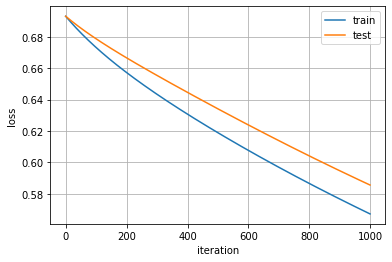

In [992]:
def sigmoid(Z):
    """
    Z : linear regression function
    """
    return 1 / (1+np.exp(-Z))

def loss_function(H, Y):
    """ 
    Cross-entropy error function
    Log loss penalizes both types of errors, but especially those predictions that are confident and wrong

        Parameters
    ----------
    H : array
        Array of sigmoid hypothesis results
    Y : array

    Returns
    ----------
    Ece : float
        Cross-entropy error
    """
    return (-Y*np.log(H) - (1-Y)*np.log(1-H)).mean()
        
def fit(X_train, Y_train, X_test, Y_test, n_iter, lr):
    """
    n_iter : number of iterations for gradient descent
    lr : learning rate
    returns final weight and cross-entropy loss for both training and test data
    """
    # initialize weights and loss array
    W = np.zeros(X_train.shape[1]); loss_train = []; loss_test = []

    for i in range(n_iter):
        
        # Find hypothesis and loss of training data
        Z_train = X_train.dot(W)
        H_train = sigmoid(Z_train)
        loss_train.append(loss_function(H_train,Y_train))
        
        # Find hypothesis and loss of test data
        Z_test = X_test.dot(W)
        H_test = sigmoid(Z_test)
        loss_test.append(loss_function(H_test,Y_test))
        
        # find next weight
        gradient = X_train.T.dot(H_train-Y_train) / Y_train.size
        W -= lr * gradient
        
    return (W, loss_train, loss_test)

(W, loss_train, loss_test) = fit(x_train, y_train.T[0], x_test, y_test.T[0], 1000, 0.01)
print("Weights: ", W)

plt.plot(loss_train); plt.plot(loss_test); plt.grid(); plt.xlabel('iteration'); plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right');

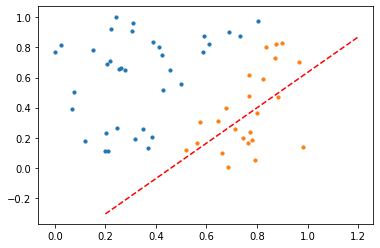

In [993]:
# Plot train datapoints
(true_coords_train, false_coords_train) = extract_true_coord(x_train[:,1], x_train[:,2], y_train[:,0])
plt.scatter(true_coords_train[:,0], true_coords_train[:,1], s=10, label='class1')
plt.scatter(false_coords_train[:, 0], false_coords_train[:,1], s=10, label='class2')

# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(x_train[:,0]) - 0.8, max(x_train[:,0]) + 0.2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/W[2]) * (W[1] * plot_x + W[0])

# plot boundary 
plt.plot(plot_x, plot_y, 'r--', label="Decision_Boundary")

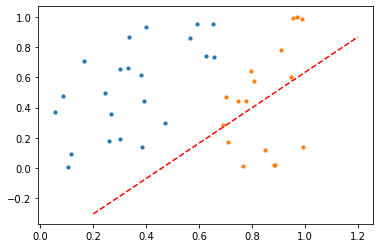

In [994]:
# Plot test datapoints
(true_coords_test, false_coords_test) = extract_true_coord(x_test[:,1], x_test[:,2], y_test[:,0])
plt.scatter(true_coords_test[:,0], true_coords_test[:,1], s=10, label='class1')
plt.scatter(false_coords_test[:, 0], false_coords_test[:,1], s=10, label='class2')

# plot boundary 
plt.plot(plot_x, plot_y, 'r--', label = "Decision_Boundary")

In this model i used $\eta$ = 0.01 and starweights = [0, 0, 0].

These results are not at all satisfactory, let's try to speed up the learning process by changing $\eta$ to 0.5. This will help alot since we are restricted to 1000 iterations:

Weights:  [  3.9990098  -11.37614981   5.78964326]


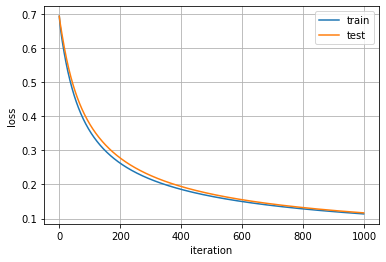

In [995]:
(W, loss_train, loss_test) = fit(x_train, y_train.T[0], x_test, y_test.T[0], 1000, 0.5)
print("Weights: ", W)

plt.plot(loss_train); plt.plot(loss_test); plt.grid(); plt.xlabel('iteration'); plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right');

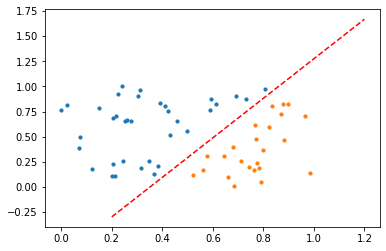

In [996]:
# Plot train datapoints
(true_coords_train, false_coords_train) = extract_true_coord(x_train[:,1], x_train[:,2], y_train[:,0])
plt.scatter(true_coords_train[:,0], true_coords_train[:,1], s=10, label='class1')
plt.scatter(false_coords_train[:, 0], false_coords_train[:,1], s=10, label='class2')

# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(x_train[:,0]) - 0.8, max(x_train[:,0]) + 0.2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/W[2]) * (W[1] * plot_x + W[0])

# plot boundary 
plt.plot(plot_x, plot_y, 'r--', label="Decision_Boundary")

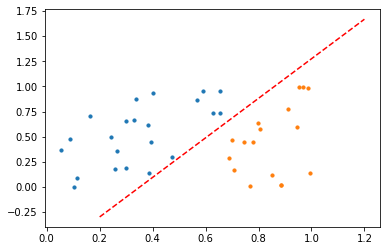

In [997]:
# Plot test datapoints
(true_coords_test, false_coords_test) = extract_true_coord(x_test[:,1], x_test[:,2], y_test[:,0])
plt.scatter(true_coords_test[:,0], true_coords_test[:,1], s=10, label='class1')
plt.scatter(false_coords_test[:, 0], false_coords_test[:,1], s=10, label='class2')

# plot boundary 
plt.plot(plot_x, plot_y, 'r--', label = "Decision_Boundary")

This model seems to fit for both test and training data, and can thus far be categorised as a good generelisation.

###### 2. [0.5 points] Load the data in cl train s2.csv and cl test 2.csv and use your logistic regression implementation to train on the data in the training set. Is the data linearly separable? Explain your reasoning. Plot the decision boundary as explained in the previous task as well as the data points in the training and test set. Discuss what can be done for logistic regression to correctly classify the dataset. Make the necessary changes to your implementation and show the new decision boundary in your report.

In [998]:
#----------- load training datasets -----------

# Load CSV dataset (ds) into variables
x_train = ds['classification']['cl_train_2'][:,0:2]
y_train = ds['classification']['cl_train_2'][:,2:3]
N = len(x_train)

# Prepend extra dimension of ones to merge bias with weights
x_train = np.column_stack((np.ones((N, 1)), x_train))

#----------- load test datasets -----------

# Load CSV dataset (ds) into variables
x_test = ds['classification']['cl_test_2'][:,0:2]
y_test = ds['classification']['cl_test_2'][:,2:3]
N = len(x_test)

# Prepend extra dimension of ones to merge bias with weights
x_test = np.column_stack((np.ones((N, 1)), x_test))

Weights:  [ 0.11276014  0.08527252 -0.35645391]


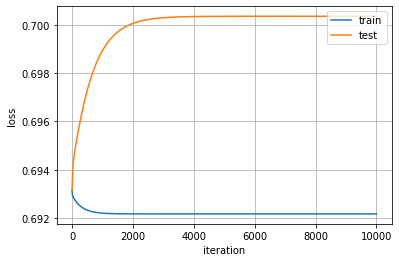

In [999]:
#----------- Find weights and show Cross-entropy error -----------

n_iterations = 10000; eta = 0.15
(W, loss_train, loss_test) = fit(x_train, y_train.T[0], x_test, y_test.T[0], n_iterations, eta)
print("Weights: ", W)

plt.plot(loss_train); plt.plot(loss_test); plt.grid(); plt.xlabel('iteration'); plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right');

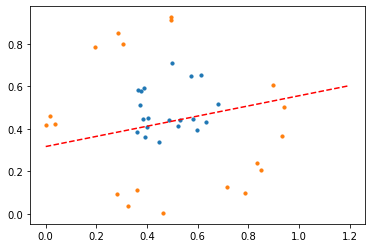

In [1000]:
# Plot test datapoints
(true_coords_test, false_coords_test) = extract_true_coord(x_test[:,1], x_test[:,2], y_test[:,0])
plt.scatter(true_coords_test[:,0], true_coords_test[:,1], s=10, label='class1')
plt.scatter(false_coords_test[:, 0], false_coords_test[:,1], s=10, label='class2')

# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(x_train[:,0]) - 1, max(x_train[:,0]) + 0.2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/W[2]) * (W[1] * plot_x + W[0])

# plot boundary 
plt.plot(plot_x, plot_y, 'r--', label = "Decision_Boundary")

* **Is the data *linearly seperable*?**

This data is not linearly seperable as we cannot seperate these clusters with a simple linear regression. For this model we will need a non-linear circle-like junction. The loss for the test data also seems to worsen as we further train our model.


* **Discuss what can be done for logistic regression to correctly classify the dataset. Make the necessary changes to your implementation and show the new decision boundary.**

It is not possible to do a linear regression of this dataset with the dimensions we are working in at the moment. For the logistic regression to be

A circle is categorized as a non-linear second order function, we can train our dataset on non-linear (squared) representations of our independent variables. One can append (an) additional axis, e.g. add a z axis to our x and y (cartesian cylinder coordinates), which in this case can be visualized as heigts of either 0 or 1 and train the dataset with (an) aditional dimension(s). In this case, I chose to create two new axis containing the squared value of the independent variables (x1 and x2), which can, for instance, be used to create a circle with a centre and radi (circle coordinates). Then the test data can be compared to the circle and we can classify it as either a 0 or 1. 

In [1001]:
#----------- load and create modified training datasets -----------

# Load CSV dataset (ds) into variables
x_train = ds['classification']['cl_train_2'][:,0:2]
y_train = ds['classification']['cl_train_2'][:,2:3]
N = len(x_train)


# Add the square of the independent variables to the 
x_train = np.append(x_train, x_train*x_train, axis=1)

# Prepend extra dimension of ones to merge bias with weights
x_train = np.column_stack((np.ones((N, 1)), x_train))


def new_fit_fun(X_train, Y_train, n_iter, lr):
    """
    n_iter : number of iterations for gradient descent
    lr : learning rate
    returns final weight and cross-entropy loss for both training and test data
    """
    # initialize weights and loss array
    W = np.zeros(X_train.shape[1]); loss_train = []; loss_test = []

    for i in range(n_iter):
        
        # Find hypothesis and loss of training data
        Z_train = X_train.dot(W)
        H_train = sigmoid(Z_train)
        loss_train.append(loss_function(H_train,Y_train))
        
        # find next weight
        gradient = X_train.T.dot(H_train-Y_train) / Y_train.size
        W -= lr * gradient
        
    return W, loss_train

Weights:  [ -8.79117581  23.62789758  22.14811    -23.90123813 -22.80583708]


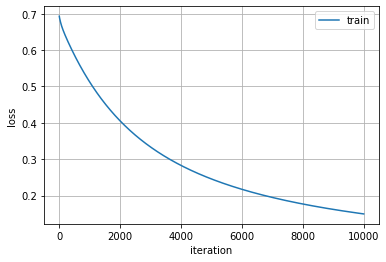

In [1002]:
#----------- Find weights and show Cross-entropy error -----------

n_iterations = 10000; eta = 0.5
(W, loss_train) = new_fit_fun(x_train, y_train.T[0], n_iterations, eta)
print("Weights: ", W)

plt.plot(loss_train); plt.grid(); plt.xlabel('iteration'); plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right');

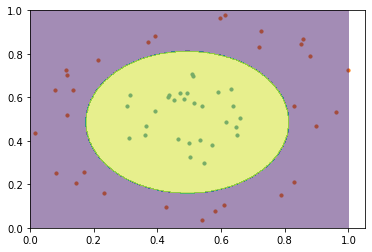

In [1003]:
# Plot training datapoints
(true_coords_train, false_coords_train) = extract_true_coord(x_train[:,1], x_train[:,2], y_train[:,0])
plt.scatter(true_coords_train[:,0], true_coords_train[:,1], s=10, label='class1')
plt.scatter(false_coords_train[:, 0], false_coords_train[:,1], s=10, label='class2')

# Create a meshgrid of x1 and x2 axis
M = 500 # resolution of grid
x1_axis = np.linspace(0, 1, M)
x2_axis = np.linspace(0, 1, M) 
# Create meshgrid
x1_grid, x2_grid = np.meshgrid(x1_axis, x2_axis) 

# Apply the weights to every point in the grid
# Normal weights to normal axis variables and square coeffs to the squared axis variables
def circle_boundary(x2_grid, x1_grid, M):
    out = np.zeros([M, M])
    for i in range(M):
        for j in range(M):
            x1 = x1_grid[i,j]
            x2 = x2_grid[i,j]
            y = W[0] + W[1]*x1 + W[2]*x2 + W[3]*x1*x1 + W[4]*x2*x2
            # If output is higher than 0, i.e. above the 0.5% probability from the sigmoid function make the pixel a 1
            if y > 0:  
                out[i,j] = 1
    return out

# Get the grid of 1s and 0s
out_grid = circle_boundary(x2_grid, x1_grid, M)

# Plot the output in a contour plot, since we have binary values we only get two colours       
plt.contourf(x1_axis, x2_axis, out,  alpha=0.5)     

We have now succesfully created a linearized model for creating a "non-linear" cluster.

We can also check how it does on the test set of course:

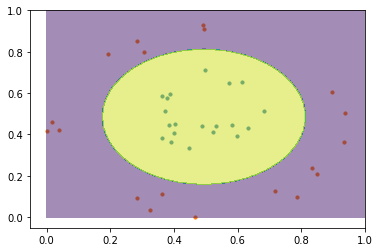

In [977]:
# Plot test datapoints
(true_coords_test, false_coords_test) = extract_true_coord(x_test[:,1], x_test[:,2], y_test[:,0])
plt.scatter(true_coords_test[:,0], true_coords_test[:,1], s=10, label='class1')
plt.scatter(false_coords_test[:, 0], false_coords_test[:,1], s=10, label='class2')

# Plot the output in a contour plot, since we have binary values we only get two colours       
plt.contourf(x1_axis, x2_axis, out,  alpha=0.5)     

It seems to generalise accross these datasets at least.